In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')


In [29]:
# Check the first few rows to understand the data
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  10-07-2022
1      C0002      Elizabeth Lutz           Asia  13-02-2022
2      C0003      Michael Rivera  South America  07-03-2024
3      C0004  Kathleen Rodriguez  South America  09-10-2022
4      C0005         Laura Weber           Asia  15-08-2022
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID   TransactionDate  Quantity  TotalValue  \
0        T00001      C0199      P067  25-08-2024 12:38         1      300.68   
1        T00112      C0146      P067  27-05-2024 22:23         1      300.68   
2        T00166      C0127      P067  25-04-2024 07:

In [31]:
# Check for missing values
customers_df.isnull().sum()
products_df.isnull().sum()
transactions_df.isnull().sum()


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [33]:

# Convert 'SignupDate' and 'TransactionDate' to datetime format
# Using 'errors="coerce"' to handle invalid date formats, turning them into NaT (Not a Time)

customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')

# Verify the conversion
print(customers_df['SignupDate'].head())
print(transactions_df['TransactionDate'].head())

# Check for any NaT values indicating invalid date conversion
print(customers_df['SignupDate'].isnull().sum())  # Number of missing values after conversion
print(transactions_df['TransactionDate'].isnull().sum())  # Number of missing values after conversion


0   2022-10-07
1          NaT
2   2024-07-03
3   2022-09-10
4          NaT
Name: SignupDate, dtype: datetime64[ns]
0   2024-08-25 12:38:00
1   2024-05-27 22:23:00
2   2024-04-25 07:38:00
3   2024-03-26 22:55:00
4   2024-03-21 15:10:00
Name: TransactionDate, dtype: datetime64[ns]
121
0


C:\Users\91773\AppData\Local\Temp\ipykernel_1980\409246322.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')


In [35]:
# Get descriptive statistics for numerical columns
print(customers_df.describe())
print(products_df.describe())
print(transactions_df.describe())


                          SignupDate
count                             79
mean   2023-08-21 17:37:12.911392512
min              2022-01-07 00:00:00
25%              2022-10-04 12:00:00
50%              2023-11-06 00:00:00
75%              2024-07-01 12:00:00
max              2024-12-04 00:00:00
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
                  TransactionDate     Quantity   TotalValue       Price
count                        1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:32:32.580000     2.537000   689.995560   272.55407
min           2023-12-30 15:29:00     1.000000    16.080000    16.08000
25%           2024-03-25 22:05:00     2.000000   295.295000   147.95000
50%           2024-06-26 17:21:30     3.000000   588.880000   299.93000
75%           2024-09-19 14:19:30     4.000000  1011.660000   404.40000
max           2024-12-28 11:00:00     

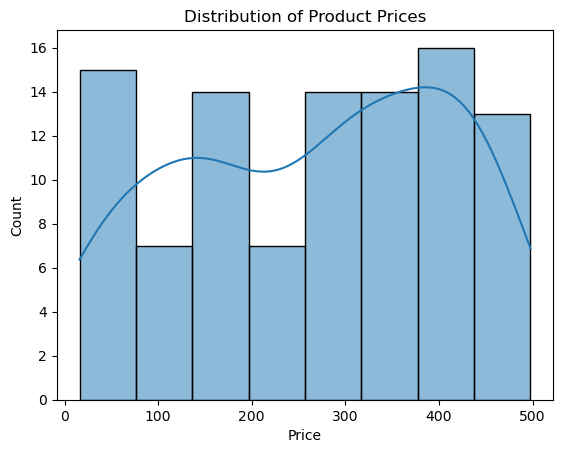

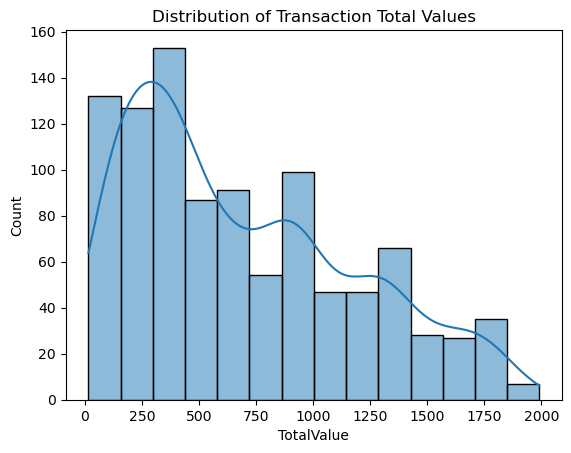

In [15]:
# Distribution of product prices
sns.histplot(products_df['Price'], kde=True)
plt.title('Distribution of Product Prices')
plt.show()

# Distribution of transaction total value
sns.histplot(transactions_df['TotalValue'], kde=True)
plt.title('Distribution of Transaction Total Values')
plt.show()


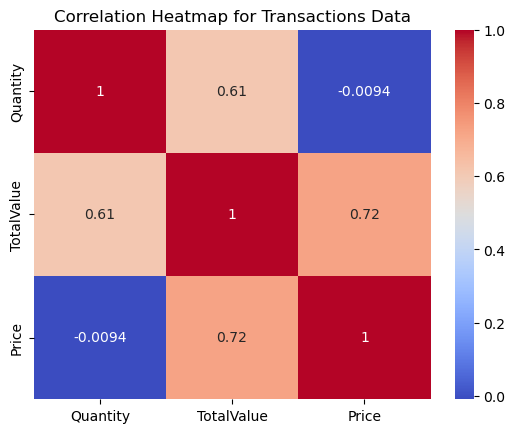

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_columns = transactions_df.select_dtypes(include=['number']).columns

# Compute the correlation matrix using only numeric columns
correlation_matrix = transactions_df[numeric_columns].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Transactions Data')
plt.show()
